In [10]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### 가상 인물사진 모드
1. 배경이 있는 셀카를 촬영합니다.(배경과 사람의 거리가 약간 멀리 있으면 좋습니다.)
2. 시맨틱 세그멘테이션(Semantic segmentation)으로 피사체(사람)와 배경을 분리합니다.
3. 블러링(blurring) 기술로 배경을 흐리게 합니다.
4. 피사체를 배경의 원래 위치에 합성합니다.

### DeepLab 세그멘테이션 모델

In [16]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7a33f91e7d60>)

In [17]:
# from pixellib.semantic import semantic_segmentation
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듦
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

(550, 826, 3) (550, 826, 3)


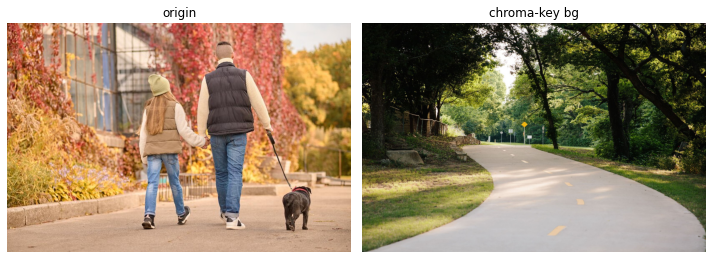

In [18]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself1.jpg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself2.jpg'
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself3.jpg'
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself4.jpg'
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/walkwithdog.jpg'
img_path6 = os.getenv('HOME')+'/aiffel/human_segmentation/images/walkingtrail.jpg'


img_orig = cv2.imread(img_path5) 
img_orig2 = cv2.imread(img_path6)

w = img_orig.shape[1]
h = img_orig.shape[0]
img_orig2 = cv2.resize(img_orig2,(w,h))
img_orig2 = cv2.flip(img_orig2,1)
print(img_orig.shape,img_orig2.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
axs[0].set_title('origin')
axs[1].imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
axs[1].set_title('chroma-key bg')

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [19]:
segvalues, output = model.segmentAsPascalvoc(img_path5) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

> pascalvoc 데이터의 라벨종류 21개, 사람은 15, 개는 12

In [20]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

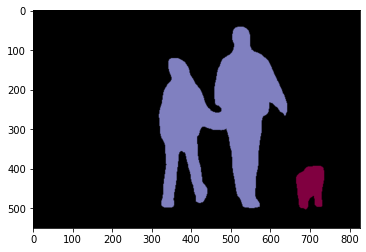

(550, 826, 3)

In [21]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()
output.shape

In [22]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 12, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [23]:
print(segvalues['masks'].shape)

(550, 826)


In [24]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨 찾기
[LABEL_NAMES[class_id] for class_id in segvalues['class_ids']]

['background', 'dog', 'person']

output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요. segvalues에는 class_ids와 masks가 있습니다. class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

> PixelLib에서 그대로 가져온 코드입니다

In [25]:
# 아래 코드를 이해하지 않아도 좋습니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
def colormap():
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3
    
    cm_list=[]
    for class_id in segvalues['class_ids']:
        cm_list.append(colormap[class_id])

    for i in range(len(cm_list)):
        temp = cm_list[i][0]
        cm_list[i][0] = cm_list[i][2]
        cm_list[i][2] = temp
    del cm_list[0]
    return cm_list
colormap()

[array([128,   0,  64]), array([128, 128, 192])]

> 여기서 주의할 것은 output 이미지가 BGR 순서로 채널 배치가 되어 있다는 점이에요. colormap은 RGB 순서이고요.
그러니 우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 줘야 합니다.

In [26]:
# seg_color1 = (128, 0, 64)
# seg_color2 = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(550, 826)


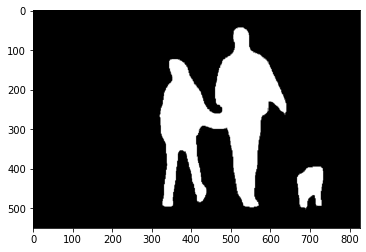

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all((output==tuple(colormap()[0]))|(output==tuple(colormap()[1])), axis=-1) # channel에 대해서 seg_color와 비교
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

> [TRUE, FALSE] >>> [255, 0]

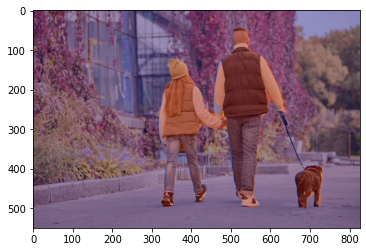

In [28]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255 # 채널이 하나이므로 graysclae로 표현된다.
# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 배경흐리게 하기

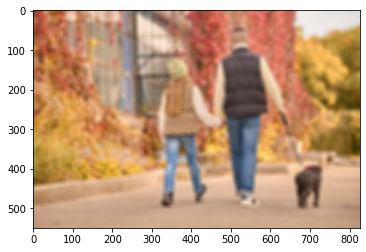

In [29]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) #BGR 형식

> [사람: 255, 배경 : 0] >>> [사람 : 0, 배경 : 255]

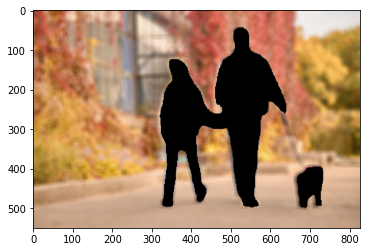

In [31]:
# cv2.bitwise_not(): 이미지가 반전됩니다. [배경 : 0, 사람: 255] 였으나
# 연산을 하고 나면 [배경 : 255, 사람 : 0]입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

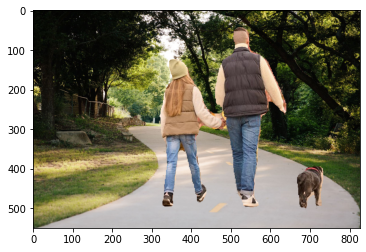

In [32]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_orig2)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

인물과 배경의 거리 차이가 있고 거리가 일정할수록 더 자연스러워 보인답니다.

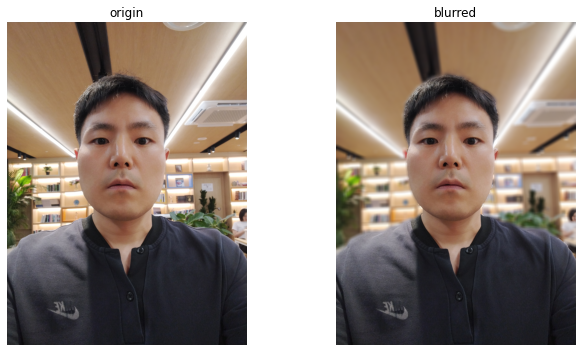

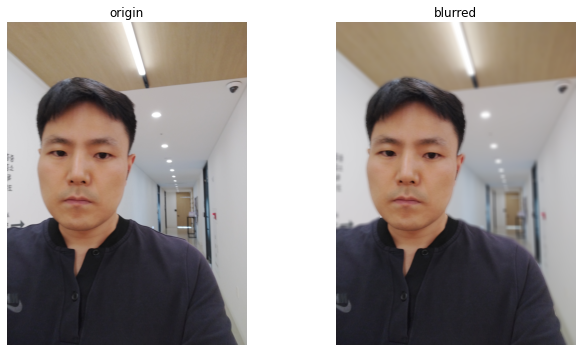

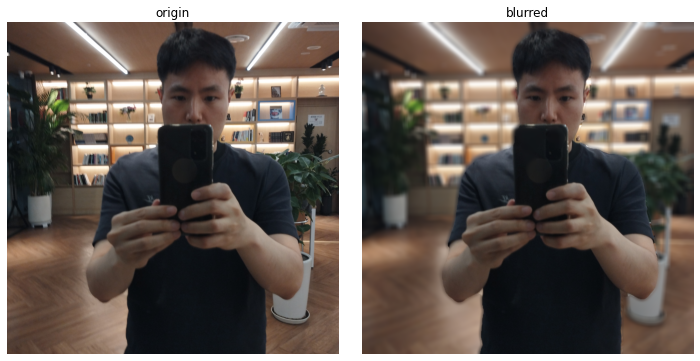

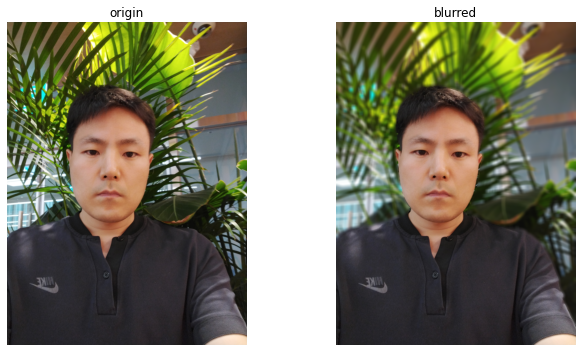

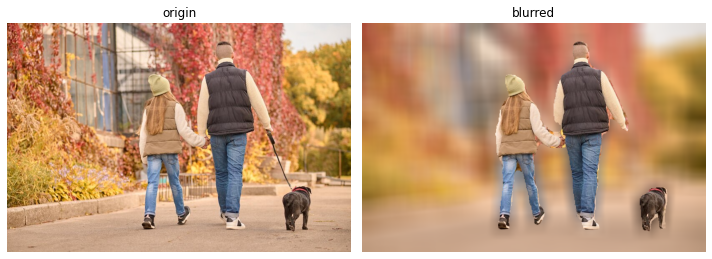

In [33]:
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself1.jpg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself2.jpg'
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself3.jpg'
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/memyself4.jpg'
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/walkwithdog.jpg'


def whathappens(img_path):   
    img_orig = cv2.imread(img_path) 
    segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
    
    # channel에 대해서 seg_color와 비교
    seg_map = np.all((output==tuple(colormap()[0]))|(output==tuple(colormap()[1])), axis=-1) 
    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255 # 채널이 하나이므로 graysclae로 표현된다.
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) #BGR 형식

    # cv2.bitwise_not(): 이미지가 반전됩니다. [배경 : 0, 사람: 255] 였으나
    # 연산을 하고 나면 [배경 : 255, 사람 : 0]입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    img_orig_blur = cv2.blur(img_orig, (50,50))
    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # np.where(조건, 참일때, 거짓일때)
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용합니다.
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
    comprs1 = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    comprs2 = cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(comprs1)
    axs[0].set_title('origin')
    axs[1].imshow(comprs2)
    axs[1].set_title('blurred')

    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
img_paths = [img_path1,img_path2,img_path3,img_path4,img_path5,]

for img_path in img_paths:
    whathappens(img_path)

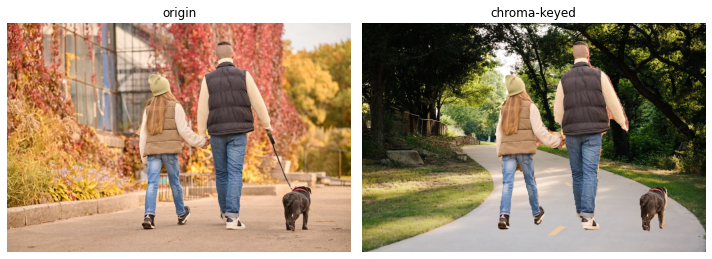

In [34]:
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/walkwithdog.jpg'
img_path6 = os.getenv('HOME')+'/aiffel/human_segmentation/images/walkingtrail.jpg'


def whathappens2(img_path5,img_path6):   
    img_orig = cv2.imread(img_path5) 
    img_orig2 = cv2.imread(img_path6)

    w = img_orig.shape[1]
    h = img_orig.shape[0]
    img_orig2 = cv2.resize(img_orig2,(w,h))
    img_orig2 = cv2.flip(img_orig2,1)
    
    segvalues, output = model.segmentAsPascalvoc(img_path5) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
    
    # channel에 대해서 seg_color와 비교
    seg_map = np.all((output==tuple(colormap()[0]))|(output==tuple(colormap()[1])), axis=-1) 
    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255 # 채널이 하나이므로 graysclae로 표현된다.
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) #BGR 형식

#     # cv2.bitwise_not(): 이미지가 반전됩니다. [배경 : 0, 사람: 255] 였으나
#     # 연산을 하고 나면 [배경 : 255, 사람 : 0]입니다.
#     img_bg_mask = cv2.bitwise_not(img_mask_color)

#     img_orig_blur = cv2.blur(img_orig, (50,50))
#     # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
#     # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
#     # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
#     img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # np.where(조건, 참일때, 거짓일때)
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용합니다.
    img_concat = np.where(img_mask_color==255, img_orig, img_orig2)
    # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
    comprs1 = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    comprs2 = cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(comprs1)
    axs[0].set_title('origin')
    axs[1].imshow(comprs2)
    axs[1].set_title('chroma-keyed')

    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# kwargs = {"img_path": img_path, "img_path2": img_path2}    
# whathappens2(**kwargs)
args = [img_path5, img_path6]    
whathappens2(*args)

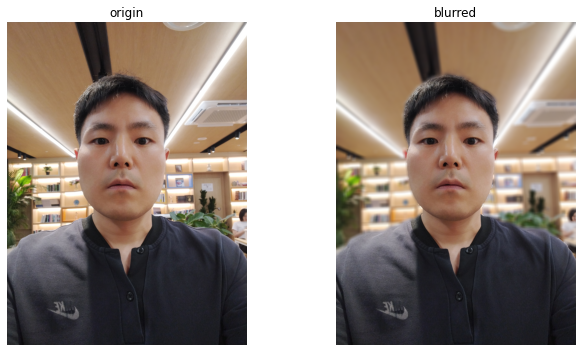

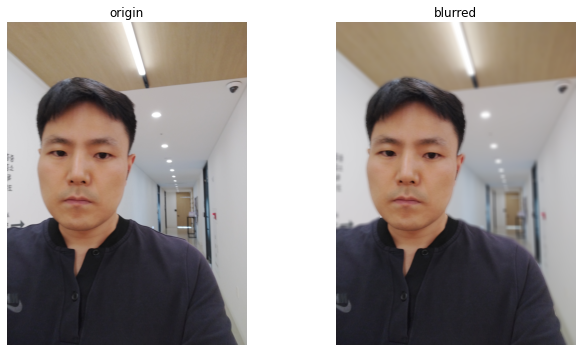

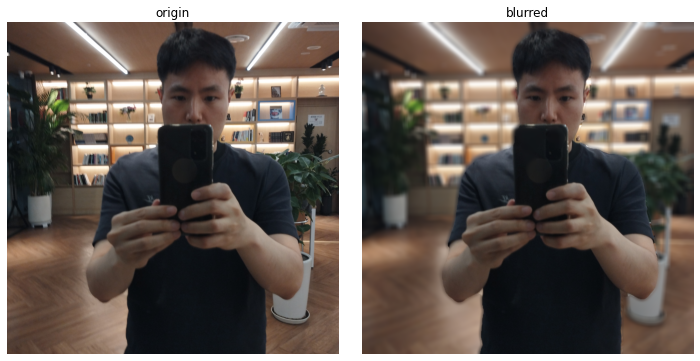

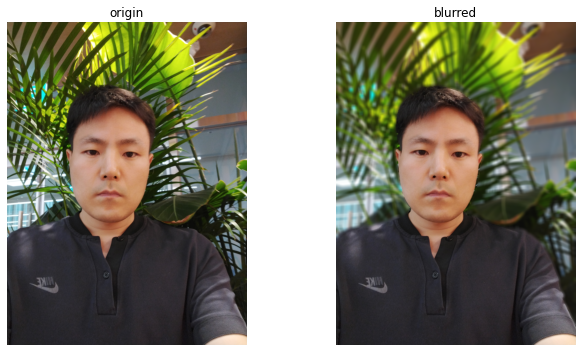

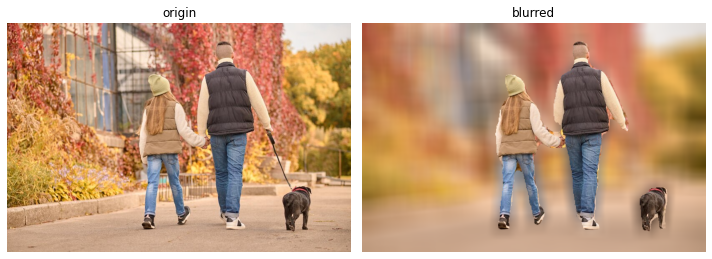

In [35]:
args = [img_path5, img_path6] 
img_paths = [img_path1,img_path2,img_path3,img_path4,img_path5,]
# img_paths = [img_path1,img_path2,img_path3,img_path4,img_path5,args]

for i in range(len(img_paths)):
    if i<=4:
        whathappens(img_paths[i])
    else: whathappens2(*args)

# 회고

### Step 1. 인물모드 직접 해 보기
* 1인 사진에 배경과 인물 사이에 거리가 있어 semantic segmentation으로서는 효과가 좋았다.
* 시도 자체가 semantic segmentation이서 여러사람이 있는 사진에서 해보는 것이 다음단계일 것 같다.
* 1인 사진에 배경과 인물 사이가 가까운 사진은 문제가 없었다. 

### Step 2. 사진에서 문제점 찾기
* 원본사진에서 조명의 영향이 컸던 부분은 분할의 경계선이 무너진다.
![handin_circled](./human_segmentation/images/handinpic_circled.png)

### Step 3. 해결 방법을 제안해 보기
1. Context-Aware Refinement:

    1. 문제: 일반적인 Semantic Segmentation 알고리즘은 복잡하거나 어수선한 배경에서 세밀한 디테일과 경계를 표현하는데 어려움을 겪습니다.

    2. 솔루션: 주변 이미지의 컨텍스트 정보를 활용하여 세분화된 결과를 도출하는 Context-Aware Refinement 단계를 추가합니다. 다음과 같은 기술을 사용할 수 있습니다.

        1. Conditional Random Fields (CRFs): CRFs는 픽셀과 주변 픽셀 간의 관계를 모델링하는 그래픽 모델입니다. 이를 통해 더욱 정제된 세분화 경계를 생성할 수 있습니다.
        2. Attention Mechanisms: Attention mechanisms은 세분화 작업과 관련된 중요도에 따라 이미지의 특정 영역에 집중할 수 있습니다. 이는 객체 경계의 정확도를 향상시킵니다.


2. Multi-Scale Feature Fusion:

    1. 문제: Semantic Segmentation 알고리즘은 합성곱 레이어의 제한적인 수용 필드로 인해 세밀한 디테일을 놓칠 수 있습니다.

    2. 솔루션: 다양한 이미지 스케일의 정보를 통합하는 Multi-Scale Feature Fusion을 사용합니다. 다음과 같은 기술을 사용할 수 있습니다.

        1. Pyramid Scene Parsing (PSPNet): PSPNet은 여러 스케일에서 특징을 추출하고 피라미드 풀링 모듈을 사용하여 결합하여 전역 및 로컬 컨텍스트를 모두 캡처합니다.
        2. DeepLabv3+: DeepLabv3+는 atrous spatial pyramid pooling (ASPP) 모듈을 사용하여 네트워크 깊이를 늘리지 않고도 여러 스케일에서 특징을 캡처하기 위해 합성곱 필터를 확장합니다.


3. Adversarial Learning:
    1. 문제: Semantic Segmentation 모델은 세분화 마스크에 인공물이나 불일치를 발생시킬 수 있습니다.

    2. 솔루션: Adversarial Learning을 도입하여 모델을 정규화하고 세분화 마스크의 품질을 향상시킵니다. 다음과 같은 기술을 사용할 수 있습니다.

        1. Adversarial Loss: 모델이 실제 마스크와 구별할 수 없는 실제 세분화 마스크를 생성하도록 유도하는 Adversarial Loss를 도입합니다.
        2. GAN-Based Segmentation: Generative Adversarial Networks (GANs)를 사용하여 세분화 마스크를 직접 생성하여 결과의 품질과 일관성을 향상시킬 수 있습니다.